# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style('grade3')

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import Normalizer, KBinsDiscretizer
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

## 2. Frequent task – 1/2 A4 (Individual)

### 2a. Use the SPACE SAVING algorithm

#### load raw data

In [35]:
# Function to discretize data
def discretization(df: pd.DataFrame, quantile=10, plot=False, sel=10):
    df = df[~df.Label.str.contains("Background")]

    if sel in [9, 10]:
        Botnet = [
            "147.32.84.165", "147.32.84.191", "147.32.84.192", "147.32.84.193",
            "147.32.84.204", "147.32.84.205", "147.32.84.206", "147.32.84.207",
            "147.32.84.208", "147.32.84.209"
        ]
    elif sel in [11, 12]:
        Botnet = ['147.32.84.165', '147.32.84.191', '147.32.84.192']
    df['Botnet'] = df['SrcAddr'].isin(Botnet)

    protocol_encoder = {'arp': 0, 'udp': 1, 'tcp': 2, 'icmp': 3, 'rtp': 4}
    df["Proto"].replace('arp', protocol_encoder['arp'], inplace=True)
    df["Proto"].replace('udp', protocol_encoder['udp'], inplace=True)
    df["Proto"].replace('tcp', protocol_encoder['tcp'], inplace=True)
    df["Proto"].replace('icmp', protocol_encoder['icmp'], inplace=True)
    df["Proto"].replace('rtp', protocol_encoder['rtp'], inplace=True)

    features = df[['Dur', 'Proto']]
    features_norm = Normalizer().fit_transform(features)
    pca = PCA(n_components=1)
    feature_comb = pca.fit_transform(features_norm,
                                     y=df['Botnet'].values).reshape(-1, 1)

    spearman = []
    for i in range(2, 50):
        KBins = KBinsDiscretizer(n_bins=i,
                                 encode='ordinal',
                                 strategy='quantile')
        feature_disc = KBins.fit_transform(feature_comb)
        spearman.append(spearmanr(feature_disc, feature_comb)[0])
    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2, 50), spearman)
    plt.xticks(np.arange(2, 50))
    plt.xlabel("number of bins")
    plt.ylabel("spearman relation")
    plt.show()

    feature_disc = KBinsDiscretizer(
        n_bins=quantile, encode='ordinal',
        strategy='quantile').fit_transform(feature_comb)
    df['feature'] = feature_disc

    if (plot):
        df_botnet = df[df['Botnet'] == 1]
        df_benign = df[df['Botnet'] != 1]

        botnet_result = np.unique(df_botnet.feature.values, return_counts=True)
        benign_result = np.unique(df_benign.feature.values, return_counts=True)

        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.bar(botnet_result[0], botnet_result[1])
        plt.xticks(botnet_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("botnet")
        plt.subplot(122)
        plt.bar(benign_result[0], benign_result[1])
        plt.xticks(benign_result[0])
        plt.xlabel("bin")
        plt.ylabel("count")
        plt.title("benign")
        plt.show()

    return df

CTU-13 scenarios 10


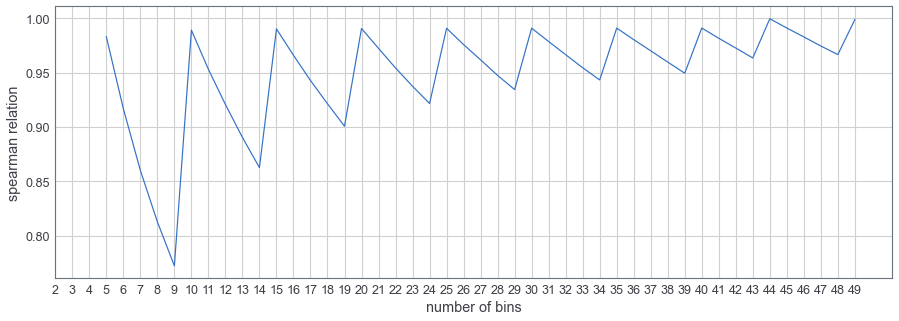

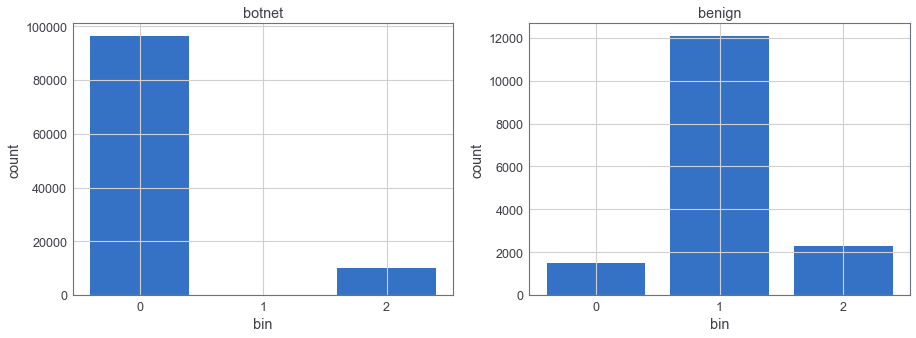

In [36]:
# load the raw data from file
raw_source10 = pd.read_csv('./dataset/dataset_10/capture20110818.binetflow')
# preprocessing
print("CTU-13 scenarios 10")
source10 = discretization(raw_source10, quantile=10, plot=True, sel=10)

In [37]:
source10.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Botnet,feature
532,2011/08/18 10:19:15.693956,3587.569824,2,147.32.84.164,54784,<?>,74.125.232.215,443,PA_PA,0.0,0.0,3049,978731,245317,flow=From-Normal-V51-Grill,False,2.0
822,2011/08/18 10:19:18.143576,198.072739,2,147.32.84.164,56165,<?>,74.125.232.197,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill,False,2.0
842,2011/08/18 10:19:18.303590,197.928329,2,147.32.84.164,57965,<?>,209.85.149.138,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill,False,2.0
1021,2011/08/18 10:19:19.838272,0.000399,1,147.32.84.170,45807,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek,False,1.0
1022,2011/08/18 10:19:19.839123,0.000400,1,147.32.84.170,35380,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek,False,1.0


#### load the discretized data

In [38]:
# load discretized data and extract features
all_data = source10['feature'].astype(int).astype(str)
# separate benign and botnet data
benign_data = source10[source10['Botnet']!= True]
input_benign = benign_data['feature'].astype(int).astype(str)

botnet_data = source10[source10['Botnet']== True]
input_botnet = botnet_data['feature'].astype(int).astype(str)
# convert features into list
input_botnet = input_botnet.to_list()
input_benign = input_benign.to_list()
input_all = all_data.to_list()

#### define the functions to find the top10 features in botnet and benign dataset

In [39]:
# top k elements found by spacesaving
def SpaceSavingCounting(input_stream, k):
    '''
    input_stream: input string data
    k: top k frequent elements
    Returns a dictionary <char,count>
    '''
    ss_counters = {} # dictionary for 3-gram and its amount
    ngram_input = [] # list for converting the input stream into 3-gram
    n_gram = 3 # N gram

    for i in range(0, len(input_stream) - n_gram + 1):
        ngram_input.append("".join(input_stream[i:i + n_gram]))
#     print(ngram_input)
    for char in ngram_input:
        if char in ss_counters:
            # element existed: increment the counter by 1 if this element exists
            ss_counters[char] += 1
        else:
            if len(ss_counters) + 1 > k:  # the counter overflow
                # get the counter with least number
                min_counter = min(ss_counters, key=ss_counters.get)
                # increase on the original number
                ss_counters[char] = ss_counters.pop(min_counter) + 1
            else:
                ss_counters[char] = 1  # new element
                # Sort the frequency in descending order
    ss_sorted_counters = {k: v for k, v in sorted(
        ss_counters.items(), key=lambda item: item[1], reverse=True)}
    i = 0
    result_ss = {} # return the top 10 elements
    for k,v in ss_sorted_counters.items():
        i +=1
        if(i<=10):
            result_ss[k] = v
    return ss_sorted_counters, result_ss

In [40]:
# actual dictionary
def ActualCounting(input_stream,knum):
    '''
    input_stream: input string data
    Returns a dictionary <char,count>
    k:top k elements
    '''
    n_gram = 3
    ngram_input = []
    top_elements = {}
    counter = 0
#     for i in data:
#         input_stream += str(data)

    for i in range(0, len(input_stream) - n_gram + 1):
        ngram_input.append("".join(input_stream[i:i + n_gram]))

    actual_counters = {}

    for char in ngram_input:
        if char in actual_counters:
            actual_counters[char] += 1
        else:
            actual_counters[char] = 1

    # Sort the frequency in descending order
    sorted_counter = {k: v for k, v in sorted(
        actual_counters.items(), key=lambda item: item[1], reverse=True)}
    for k, v in sorted_counter.items():
        if counter < knum:
            top_elements[k] = v
        counter += 1
    i = 0
    result_actual = {}# return the top 10 elements
    for k,v in top_elements.items():
        i +=1
        if(i<=10):
            result_actual[k] = v
    return top_elements, result_actual

In [41]:
def compare_ss_actual(input_data, knum):
    '''
    input_data: the input dataframe
    knum: the number of counters to compare the features found by space saving and actual
    '''
    knum_ss = {}
    knum_acutal ={}
    knum_ss, ss_10 = SpaceSavingCounting(input_data, knum)
    knum_actual, actual_10 = ActualCounting(input_data, knum)
    # get the result in the dataframe which can be returned
    df_result = pd.DataFrame(list(zip(ss_10.keys(),ss_10.values(),actual_10.keys(),actual_10.values())), 
                             columns=['Spacesaving_top10_3grams','Spacesaving_amount','Actual_top10_3grams','Actual_amount'])
    # the number of the same features in the spacesaving and actual dictionary
    same_key = 0
    # the list to store the accuracy of each same feature : the amount of this feature found by space saving/ the actual amount of the feature
    accuracy_list = []
    for k in ss_10.keys():
        if k in actual_10.keys():
            same_key += 1
            accuracy_list.append(float(ss_10[k]/actual_10[k]))
            print("The approximation of " + str(k) + " is: " +
                  str(float(ss_10[k]/actual_10[k])))
    print("Benign Data set: The total same keys in SpaceSaving and Actual is " + str(same_key))
    return df_result, accuracy_list, same_key

#### Space Saving result and accuracy - number of counters

In [42]:
element_num = np.arange(10,25,1)
accuracy_results = []
same_keynums = []
for i in element_num:
    df_result = pd.DataFrame
    same_keynum = 0
    accuracy_result = []
    print("\n The accuracy of " + str(i) + " counters is shown below:\n")
    df_result, accuracy_result, same_keynum = compare_ss_actual(input_all,i)
    same_keynums.append(same_keynum)
    accuracy_results.append(np.mean(accuracy_result))
    




 The accuracy of 10 counters is shown below:

The approximation of 000 is: 1.0014128355484428
The approximation of 111 is: 1.0
The approximation of 020 is: 1.016730697732061
The approximation of 200 is: 1.0161510746676605
The approximation of 002 is: 1.0164322171044442
The approximation of 202 is: 1.9668571428571429
The approximation of 220 is: 1.9752941176470589
Benign Data set: The total same keys in SpaceSaving and Actual is 7

 The accuracy of 11 counters is shown below:

The approximation of 000 is: 1.0010877583426063
The approximation of 111 is: 1.0
The approximation of 020 is: 1.012764902714091
The approximation of 200 is: 1.0121754255186979
The approximation of 002 is: 1.0124486493215485
The approximation of 202 is: 1.7108571428571429
The approximation of 220 is: 1.7105882352941177
Benign Data set: The total same keys in SpaceSaving and Actual is 7

 The accuracy of 12 counters is shown below:

The approximation of 000 is: 1.0008502019229566
The approximation of 111 is: 1.0
Th

Figure1 : The relationship between accuracy and number of counters
Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual


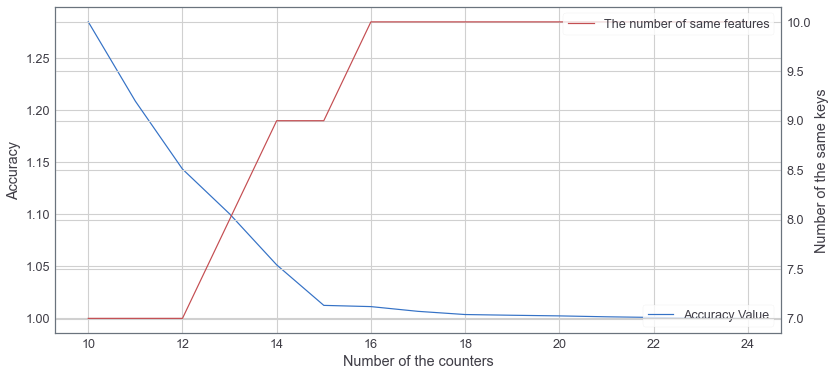

In [43]:
print("Figure1 : The relationship between accuracy and number of counters")
print("Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual")
fig = plt.figure(figsize = (13,6))

ax1 = fig.add_subplot(111)
ax1.plot(element_num,accuracy_results,label='Accuracy Value')
plt.xlabel('Number of the counters')  
ax1.set_ylabel("Accuracy")
plt.legend(loc=4)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(element_num,same_keynums, 'r',label='The number of same features')
ax2.set_ylabel('Number of the same keys')
plt.legend(loc=1)

plt.show()

#### Compare the space saving applied in benign and botnet data

In [44]:
#benign 
benign_num = np.arange(10,25,1)
benign_accuracy_results = []
benign_same_keynums = []
for i in benign_num:
    df_benign_result = pd.DataFrame
    benign_same_keynum = 0
    benign_accuracy_result = []
    print("\n The accuracy of " + str(i) + " counters is shown below:\n")
    df_benign_result, benign_accuracy_result, benign_same_keynum = compare_ss_actual(input_benign,i)
    benign_same_keynums.append(benign_same_keynum)
    benign_accuracy_results.append(np.mean(benign_accuracy_result))


 The accuracy of 10 counters is shown below:

The approximation of 111 is: 1.0
The approximation of 211 is: 1.0
The approximation of 112 is: 1.0
The approximation of 000 is: 1.169467787114846
The approximation of 222 is: 1.0
The approximation of 121 is: 1.0
The approximation of 011 is: 1.6612466124661247
The approximation of 110 is: 1.6495956873315365
The approximation of 221 is: 1.9645161290322581
Benign Data set: The total same keys in SpaceSaving and Actual is 9

 The accuracy of 11 counters is shown below:

The approximation of 111 is: 1.0
The approximation of 211 is: 1.0
The approximation of 112 is: 1.0
The approximation of 222 is: 1.0
The approximation of 000 is: 1.1288515406162465
The approximation of 121 is: 1.0
The approximation of 011 is: 1.3468834688346885
The approximation of 110 is: 1.3369272237196765
The approximation of 122 is: 1.555205047318612
Benign Data set: The total same keys in SpaceSaving and Actual is 9

 The accuracy of 12 counters is shown below:

The approxi

Figure2 : The relationship between accuracy and number of counters in benign data
Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual


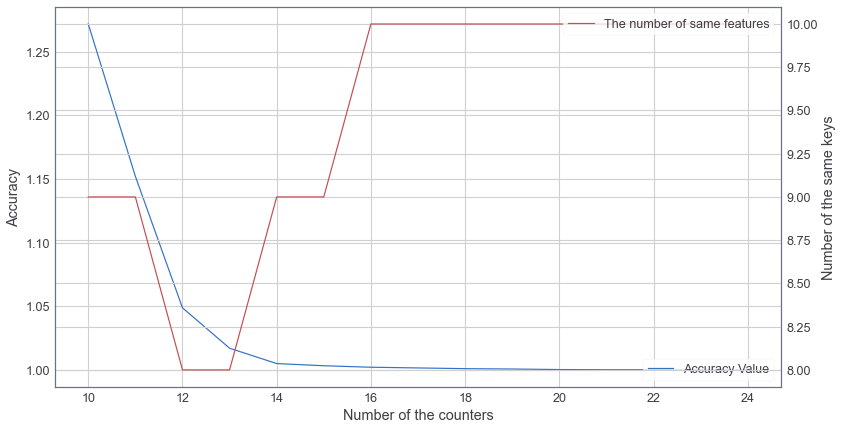

In [45]:
print("Figure2 : The relationship between accuracy and number of counters in benign data")
print("Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual")
fig = plt.figure(figsize = (13,7))

ax1 = fig.add_subplot(111)
ax1.plot(benign_num,benign_accuracy_results,label='Accuracy Value')
plt.xlabel('Number of the counters')  
ax1.set_ylabel("Accuracy")
plt.legend(loc=4)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(benign_num,benign_same_keynums, 'r',label='The number of same features')
ax2.set_ylabel('Number of the same keys')
plt.legend(loc=1)

plt.show()

In [46]:
#botnet
botnet_num = np.arange(10,25,1)
botnet_accuracy_results = []
botnet_same_keynums = []
for i in botnet_num:
    df_botnet_result = pd.DataFrame
    botnet_same_keynum = 0
    botnet_accuracy_result = []
    print("\n The accuracy of " + str(i) + " counters is shown below:\n")
    df_botnet_result, botnet_accuracy_result, botnet_same_keynum = compare_ss_actual(input_botnet,i)
    botnet_same_keynums.append(botnet_same_keynum)
    botnet_accuracy_results.append(np.mean(botnet_accuracy_result))


 The accuracy of 10 counters is shown below:

The approximation of 000 is: 1.0000755943606607
The approximation of 020 is: 1.0009940357852882
The approximation of 200 is: 1.0004998750312422
The approximation of 002 is: 1.0005000625078135
The approximation of 202 is: 1.0162412993039442
The approximation of 220 is: 1.011056511056511
The approximation of 022 is: 1.01230012300123
The approximation of 222 is: 1.0056497175141244
The approximation of 121 is: 1.7049180327868851
Benign Data set: The total same keys in SpaceSaving and Actual is 9

 The accuracy of 11 counters is shown below:

The approximation of 000 is: 1.0000503962404406
The approximation of 020 is: 1.0006212723658052
The approximation of 200 is: 1.0003749062734317
The approximation of 002 is: 1.00037504688086
The approximation of 202 is: 1.013921113689095
The approximation of 022 is: 1.0086100861008611
The approximation of 220 is: 1.0073710073710074
The approximation of 222 is: 1.0
The approximation of 121 is: 1.229508196721

Figure3 : The relationship between accuracy and number of counters in botnet data
Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual


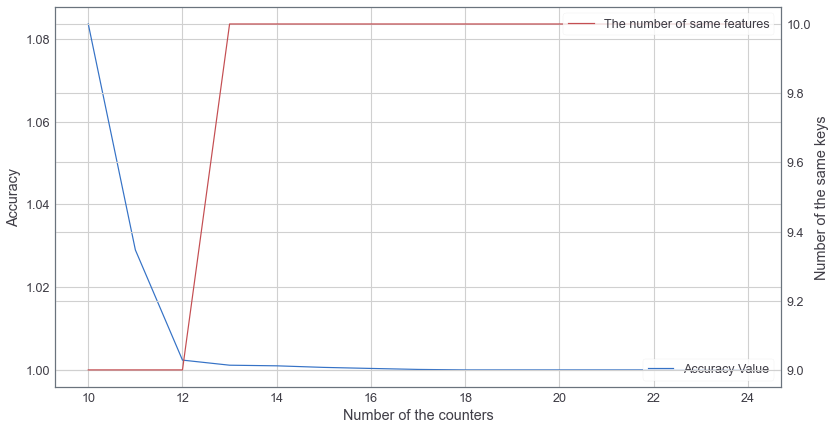

In [47]:
print("Figure3 : The relationship between accuracy and number of counters in botnet data")
print("Accuracy: The average ratio of the amount of the same feature found by Space Saving and Actual")
fig = plt.figure(figsize = (13,7))

ax1 = fig.add_subplot(111)
ax1.plot(botnet_num,botnet_accuracy_results,label='Accuracy Value')
ax1.set_ylabel("Accuracy")
plt.xlabel('Number of the counters')  
plt.legend(loc=4)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(botnet_num,botnet_same_keynums, 'r',label='The number of same features')
ax2.set_ylabel('Number of the same keys')
plt.legend(loc=1)

plt.show()

### 2b. Analysis and answers to the questions

According to the figures above, we can see that:

For all data including botnet and benign cases, the result in figure1 shows that:

1) The amount of the same feature found by the Space Saving exceeds the actual amount, resulting in an accuracy larger than 1.

2) With the number of counters increment, the number of the same feature and the accuracy are getting better. In other words, the more counters, the better the result. 

3) The turning points of the number of the same features and accuracy are different. When the number of counters reaches 16, Space Saving could find out all top 10 features as the actual result. But the average accuracy keeps getting closer to the perfect value(1). 

4) By separating the benign and botnet data in the dataset, we can see that performance of the non-infected data set and the infected data are slightly different. From both perspectives of the number of the same features in the top 10 frequent elements and accuracy - the amount of the same feature found by Space Saving, non-infected data has a worse result. The reason could be that this data set is more varied. These results could be concluded that the SpaceSaving algorithm is a good method to approximate the most frequent elements. 

5) The approximation errors could be explained using the mathematical theory as mentioned in the slides - "Any item x whose true count > m/k is stored" where m is the sum of the counters and k the number of counters. Approximation errors could occur when, for example, the last item in the stream only occurs once. In this case, the last n-gram replaces the counter with the lowest minimum value. However, this n-gram only occurred one time while the value with the minimum counter value could be way higher. The approximation is upper bounded by m/k, making Space Saving an execellent approximating distributions of data with limited memory.